In [1]:
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import random

In [2]:
#from simulate_data import *
#from topic_model import *
from lda_clust.topic_model import *
from lda_clust.simulate_data import *

# Identifiability issues: Control of overlapping topics

#### Fixed structure: D=200, K=4, H=10, V=10, N=10, M=10
#### Fix hyperpar for t and z: gamma=10, alpha=20, alpha0=1


## Model 1 & 2
#### Vary phi

In [10]:
def create_prob_dic(max_val, row_num, col_num):
    assert row_num<=col_num , "if # of rows not smaller or equal to # of columns, issue with np.fill_diagonal()"
    prob_arr=np.repeat((1-max_val)/(col_num-1), row_num*col_num)
    prob_arr=np.reshape(prob_arr,(row_num, col_num))
    np.fill_diagonal(prob_arr, max_val)
    assert all(np.sum(prob_arr,axis=1)==1), "Probs not summing to 1"
    prob_dic={i:prob_arr[i] for i in range(len(prob_arr))}
    return prob_dic

In [11]:
phi=create_prob_dic(0.8,4,10)

In [14]:
phi

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

Text(0.5, 1.0, 'Distribution of words under each topic k')

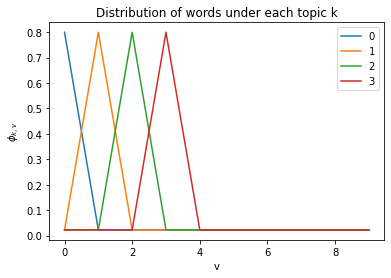

In [56]:
ax = pd.DataFrame(list(phi.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

#### Medium overlap

In [57]:
phi_med_overlap = phi.copy()
phi_med_overlap[1] = phi_med_overlap[0]
phi_med_overlap

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

#### High overlap (75% of topic distrib overlap)

In [58]:
phi_high_overlap = phi_med_overlap.copy()
phi_high_overlap[2] = phi_high_overlap[0]
phi_high_overlap

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

Text(0.5, 1.0, 'Distribution of words under each topic k')

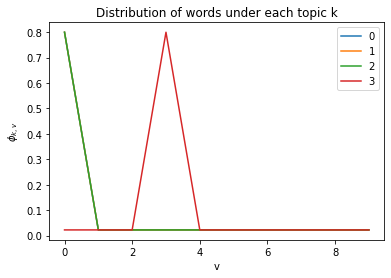

In [59]:
ax = pd.DataFrame(list(phi_high_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

#### Model 1: Simulate data

In [8]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m1_no_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
#with open(f'./simulated_data/topic_overlap/model_1/data_m1_no_overlap.pkl','wb') as file:
#    pickle.dump(sim_data_m1_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


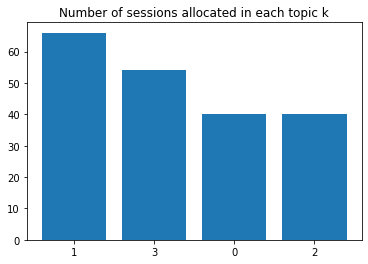

In [9]:
data=Counter(sim_data_m1_no_overlap['t'])
plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


In [10]:
sim_data_m1_no_overlap['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

In [11]:
##################
### High overlap ###
##################

seed_cnt=111
sim_data_m1_high_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
#with open(f'./simulated_data/topic_overlap/model_1/data_m1_high_overlap.pkl','wb') as file:
#    pickle.dump(sim_data_m1_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [12]:
sim_data_m1_high_overlap['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

#### Model 2: Simulate data

In [13]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m2_no_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
#with open(f'./simulated_data/topic_overlap/model_2/data_m2_no_overlap.pkl','wb') as file:
#    pickle.dump(sim_data_m2_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


In [94]:
# Get summaries for primary secondary topic allocations in simulated data
def primary_secondary_topic_barplot(sim_data):
    d3=defaultdict(list)
    #make values (lists) of inner dic, a single list
    for k,v in sim_data['z'].items():
        ls=list()
        for i in v.values():
            ls.extend(i)
        d3[k]=ls
    #apply Counter on values of dic 
    d4={k:Counter(v) for k,v in d3.items()}
    axx2=pd.DataFrame(d4).T.fillna(0).plot.bar(stacked=True,figsize=(20,5))
    axx2.set_xlabel("session d")
    axx2.set_ylabel(r'$z_{d}$')
    plt.title("Proportion of 0s and 1s in each session")

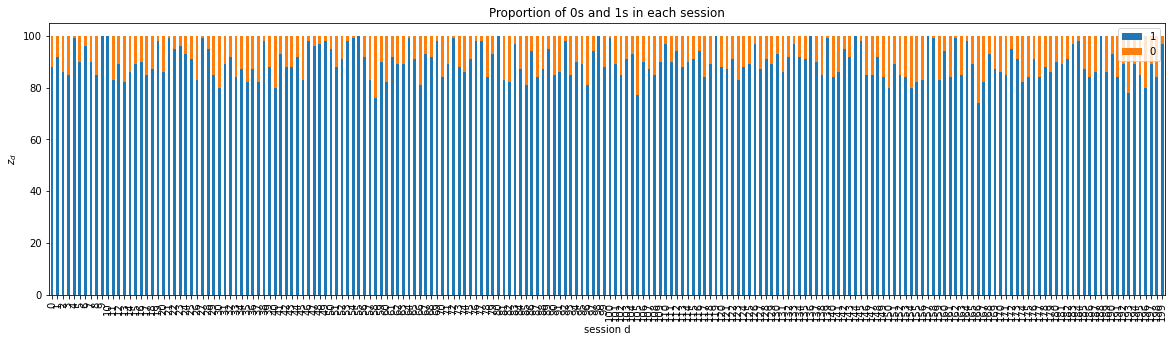

In [15]:
primary_secondary_topic_barplot(sim_data_m2_no_overlap)

In [18]:
sim_data_m2_no_overlap['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

In [19]:
##################
### High overlap ###
##################

seed_cnt=111
sim_data_m2_high_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
#with open(f'./simulated_data/topic_overlap/model_2/data_m2_high_overlap.pkl','wb') as file:
#    pickle.dump(sim_data_m2_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


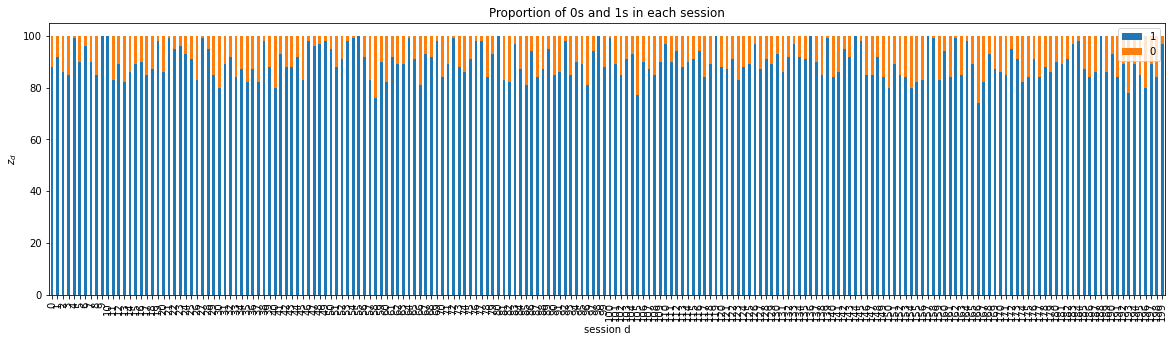

In [20]:
primary_secondary_topic_barplot(sim_data_m2_high_overlap)

In [21]:
sim_data_m2_high_overlap['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222])}

## Model 3 & 4
#### Vary phi, psi

In [61]:
phi=create_prob_dic(0.8,10,10)
psi=create_prob_dic(0.7,4,10)

#### High overlap (75% of topic distrib overlap)

In [39]:
phi_high_overlap = phi.copy()
topic_list=[2,3,4]
for i in topic_list:
    phi_high_overlap[i] = phi_high_overlap[0]
topic_list=[7,8,9]
for i in topic_list:
    phi_high_overlap[i] = phi_high_overlap[5]
phi_high_overlap

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 4: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 5: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 6: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222]),
 7: array([0.

Text(0.5, 1.0, 'Distribution of words under each topic k')

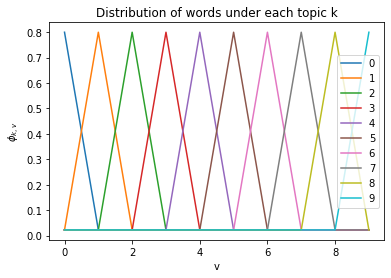

In [62]:
ax = pd.DataFrame(list(phi.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

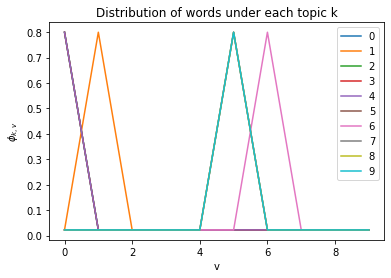

In [40]:
ax = pd.DataFrame(list(phi_high_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

In [13]:
.6/4

0.15

In [41]:
psi_high_overlap = psi.copy()
psi_high_overlap[2] = psi_high_overlap[0]
psi_high_overlap[1] = psi_high_overlap[0]
psi_high_overlap

{0: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 1: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 2: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 3: array([0.03333333, 0.03333333, 0.03333333, 0.7       , 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])}

#### Model 3: Simulate data

In [42]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m3_no_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True, psi_dic=psi, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_no_overlap.pkl','wb') as file:
    pickle.dump(sim_data_m3_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


In [44]:
sim_data_m3_no_overlap['psi']

{0: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 1: array([0.03333333, 0.7       , 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 2: array([0.03333333, 0.03333333, 0.7       , 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 3: array([0.03333333, 0.03333333, 0.03333333, 0.7       , 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])}

In [45]:
##################
### High overlap ###
##################

seed_cnt=111
sim_data_m3_high_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True, psi_dic=psi_high_overlap, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_high_overlap.pkl','wb') as file:
    pickle.dump(sim_data_m3_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [117]:
sim_data_m3_high_overlap['psi']

{0: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 1: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 2: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 3: array([0.03333333, 0.03333333, 0.03333333, 0.7       , 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])}

#### Model 4: Simulate data


In [48]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m4_no_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True, psi_dic=psi, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_no_overlap.pkl','wb') as file:
    pickle.dump(sim_data_m4_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


In [49]:
##################
### High overlap ###
##################

seed_cnt=111
sim_data_m4_high_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True, psi_dic=psi_high_overlap, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_high_overlap.pkl','wb') as file:
    pickle.dump(sim_data_m4_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [51]:
sim_data_m4_no_overlap['phi']

{0: array([0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 1: array([0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 2: array([0.02222222, 0.02222222, 0.8       , 0.02222222, 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 3: array([0.02222222, 0.02222222, 0.02222222, 0.8       , 0.02222222,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 4: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.8       ,
        0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 5: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.8       , 0.02222222, 0.02222222, 0.02222222, 0.02222222]),
 6: array([0.02222222, 0.02222222, 0.02222222, 0.02222222, 0.02222222,
        0.02222222, 0.8       , 0.02222222, 0.02222222, 0.02222222]),
 7: array([0.

In [53]:
sim_data_m4_high_overlap['psi']

{0: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 1: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 2: array([0.7       , 0.03333333, 0.03333333, 0.03333333, 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333]),
 3: array([0.03333333, 0.03333333, 0.03333333, 0.7       , 0.03333333,
        0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])}

## Model 1 & 2
#### REVISED: Vary phi

In [68]:
##### Spike to be 4 times bigger than baseline probs #######
phi=create_prob_dic(4/13,4,10)

In [69]:
phi

{0: array([0.30769231, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.07692308, 0.07692308, 0.30769231, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 3: array([0.07692308, 0.07692308, 0.07692308, 0.30769231, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308])}

Text(0.5, 1.0, 'Distribution of words under each topic k')

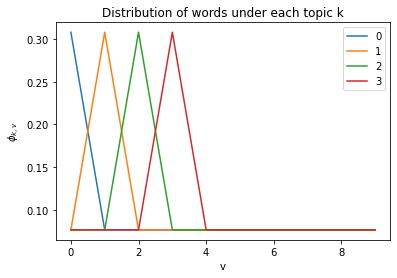

In [70]:
ax = pd.DataFrame(list(phi.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

### overlap of distributions with different spikes

In [19]:
def create_overlap(original_dic, overlap_size, prop_1, prop_2):
    new_dic=original_dic.copy()
    if overlap_size=='medium':
        num_of_vec=int(0.25*len(original_dic))
    else:
        num_of_vec=int(0.5*len(original_dic))
    vec_list_change=random.sample(range(0, len(original_dic)), num_of_vec)
    print(vec_list_change)
    vec_list_keep= [ele for ele in list(range(0,len(original_dic))) if ele not in vec_list_change]
    print(vec_list_keep)
    for i in vec_list_change:
        print(i)
        ind_vec_to_overl=random.sample(vec_list_keep, 1)
        print(ind_vec_to_overl[0])
        vec_list_keep.remove(ind_vec_to_overl[0])
        val1=max(original_dic[i]) # max of vector to be changed
        pos_val1=np.argmax(original_dic[i]) # position of max of vector to be changed
        val2=max(original_dic[ind_vec_to_overl[0]]) # max of vector to be overlapped 
        pos_val2=np.argmax(original_dic[ind_vec_to_overl[0]]) # position of max of vector to be overlapped 
        new_peak_1=val2*prop_1#0.75 # create two new peaks for vector to be changed
        new_peak_2=val2*prop_2#0.25
        new_vec=np.repeat((1-val2)/(len(original_dic[0])-2),len(original_dic[0]))
        new_vec[pos_val2]=new_peak_1
        new_vec[pos_val1]=new_peak_2
        assert round(np.sum(new_vec))==1, f"Probs not summing to 1, new vec: {new_vec}"
        new_dic[i]=new_vec
    return new_dic        

In [107]:
phi_med_overlap=create_overlap(phi,'medium')

[3]
[0, 1, 2]
3
1


In [25]:
phi_med_2_overlap=create_overlap(phi,'medium',0.5,0.5)

[0]
[1, 2, 3]
0
2


In [108]:
phi_med_overlap

{0: array([0.30769231, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.07692308, 0.07692308, 0.30769231, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 3: array([0.08653846, 0.23076923, 0.08653846, 0.07692308, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846])}

In [20]:
phi_med_2_overlap

{0: array([0.15384615, 0.08653846, 0.08653846, 0.15384615, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.07692308, 0.07692308, 0.30769231, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 3: array([0.07692308, 0.07692308, 0.07692308, 0.30769231, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308])}

Text(0.5, 1.0, 'Distribution of words under each topic k')

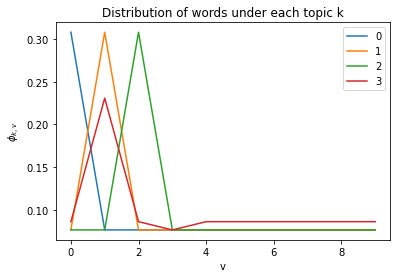

In [137]:
ax = pd.DataFrame(list(phi_med_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

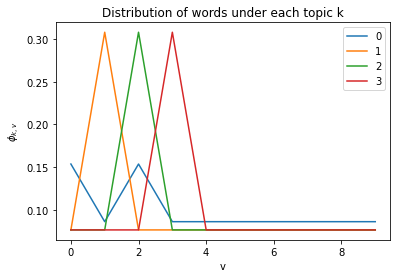

In [35]:
ax = pd.DataFrame(list(phi_med_2_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

In [113]:
phi_high_overlap=create_overlap(phi,'high')

[2, 0]
[1, 3]
2
3
0
1


Text(0.5, 1.0, 'Distribution of words under each topic k')

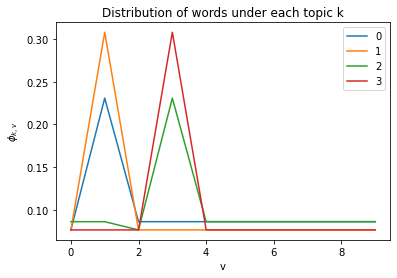

In [141]:
ax = pd.DataFrame(list(phi_high_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

#### Model 1: Simulate data

In [72]:
######################
### No overlap ###
######################

seed_cnt=111
sim_data_m1_med_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_1/data_m1_no_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m1_med_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)  

In [111]:
######################
### Medium overlap ###
######################

seed_cnt=111
sim_data_m1_med_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_overlap, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_1/data_m1_med_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m1_med_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

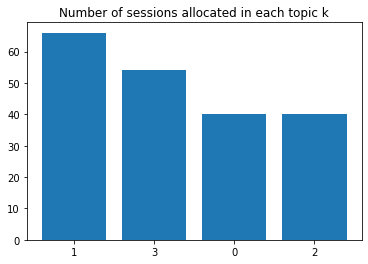

In [112]:
data=Counter(sim_data_m1_med_overlap['t'])
plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


In [36]:
######################
### Medium_2 overlap ###
######################

seed_cnt=111
sim_data_m1_med_2_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_2_overlap, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_1/data_m1_med_2_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m1_med_2_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
####################
### High overlap ###
####################

seed_cnt=111
sim_data_m1_high_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True,
                      secondary_topic = False, command_level_topics = False,
                      gamma=10, eta=.01, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_1/data_m1_high_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m1_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

#### Model 2: Simulate data


In [73]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m2_no_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_2/data_m2_no_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m2_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [131]:
######################
### Medium overlap ###
######################

seed_cnt=111
sim_data_m2_med_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_overlap, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_2/data_m2_med_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m2_med_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)


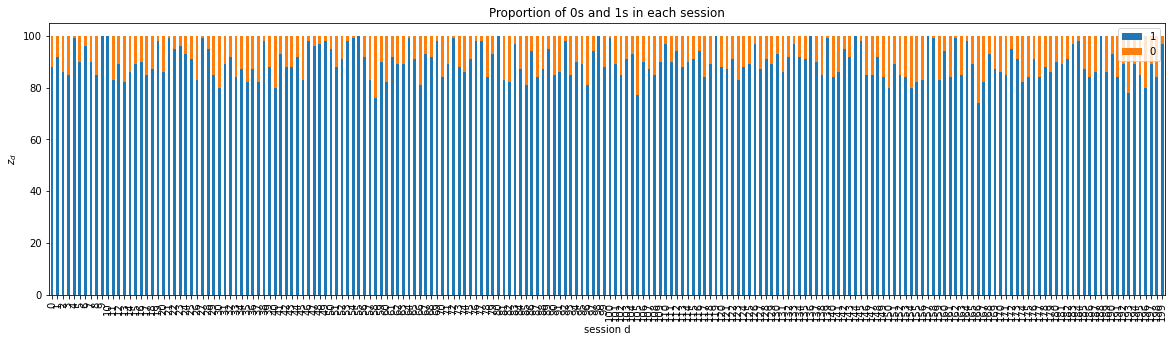

In [34]:
primary_secondary_topic_barplot(sim_data_m2_med_overlap)

In [135]:
sim_data_m2_med_overlap['phi']

{0: array([0.30769231, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.07692308, 0.07692308, 0.30769231, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 3: array([0.08653846, 0.23076923, 0.08653846, 0.07692308, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846])}

In [27]:
########################
### Medium_2 overlap ###
########################

seed_cnt=111
sim_data_m2_med_2_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_2_overlap, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_2/data_m2_med_2_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m2_med_2_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
sim_data_m2_med_2_overlap['phi']

{0: array([0.15384615, 0.08653846, 0.15384615, 0.08653846, 0.08653846,
        0.08653846, 0.08653846, 0.08653846, 0.08653846, 0.08653846]),
 1: array([0.07692308, 0.30769231, 0.07692308, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 2: array([0.07692308, 0.07692308, 0.30769231, 0.07692308, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308]),
 3: array([0.07692308, 0.07692308, 0.07692308, 0.30769231, 0.07692308,
        0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308])}

In [132]:
####################
### High overlap ###
####################

seed_cnt=111
sim_data_m2_high_overlap=simulate_data(D=200, K=4, fixed_K = True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True,
                      secondary_topic = True, command_level_topics = False, 
                      gamma=10, eta=.01,alpha=20,alpha0=1, seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_2/data_m2_high_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m2_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

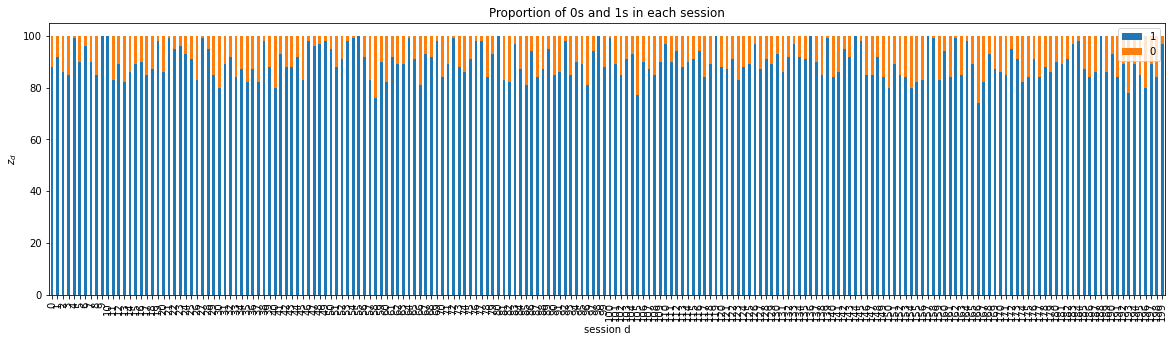

In [134]:
primary_secondary_topic_barplot(sim_data_m2_high_overlap)

## Model 3 & 4
#### Revised: Vary phi, psi

In [74]:
phi=create_prob_dic(4/13,10,10)
psi=create_prob_dic(4/13,4,10)

Text(0.5, 1.0, 'Distribution of words under each topic k')

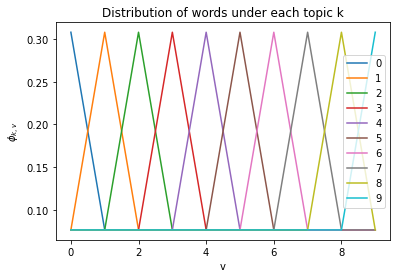

In [87]:
ax = pd.DataFrame(list(phi.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

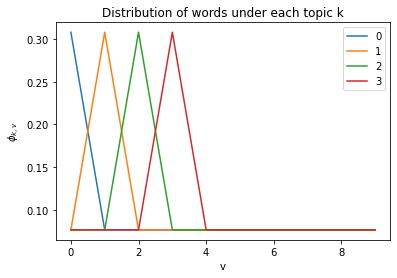

In [88]:
ax = pd.DataFrame(list(psi.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

In [146]:
phi_high_overlap=create_overlap(phi,'high')

[6, 1, 3, 5, 8]
[0, 2, 4, 7, 9]
6
4
1
2
3
7
5
0
8
9


In [147]:
phi_med_overlap=create_overlap(phi,'medium')

[1, 8]
[0, 2, 3, 4, 5, 6, 7, 9]
1
7
8
5


In [44]:
phi_med_2_overlap=create_overlap(phi,'medium',0.5,0.5)

[7, 2]
[0, 1, 3, 4, 5, 6, 8, 9]
7
4
2
8


Text(0.5, 1.0, 'Distribution of words under each topic k')

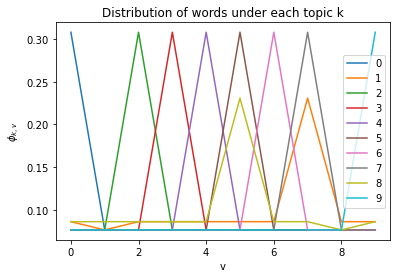

In [170]:
ax = pd.DataFrame(list(phi_med_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

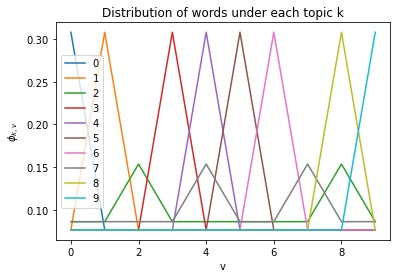

In [54]:
ax = pd.DataFrame(list(phi_med_2_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

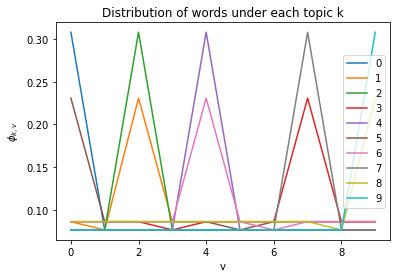

In [174]:
ax = pd.DataFrame(list(phi_high_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

In [150]:
psi_med_overlap=create_overlap(psi,'medium')

[3]
[0, 1, 2]
3
0


In [51]:
psi_med_2_overlap=create_overlap(psi,'medium',0.5,.5)

[2]
[0, 1, 3]
2
0


In [50]:
psi_high_overlap=create_overlap(psi,'high')

TypeError: create_overlap() missing 2 required positional arguments: 'prop_1' and 'prop_2'

Text(0.5, 1.0, 'Distribution of words under each topic k')

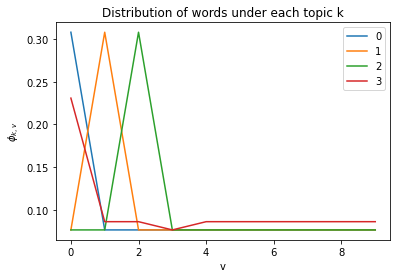

In [167]:
ax = pd.DataFrame(list(psi_med_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

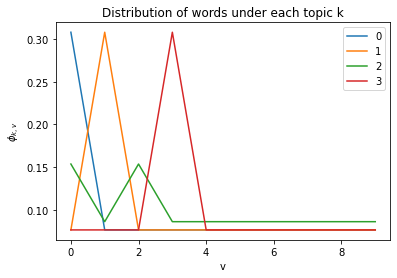

In [59]:
ax = pd.DataFrame(list(psi_med_2_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

Text(0.5, 1.0, 'Distribution of words under each topic k')

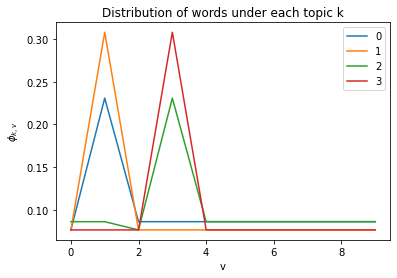

In [163]:
ax = pd.DataFrame(list(psi_high_overlap.values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

#### Model 3: Simulate data

In [89]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m3_no_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True, psi_dic=psi, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_no_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m3_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [156]:
######################
### Medium overlap ###
######################

seed_cnt=111
sim_data_m3_med_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_overlap, fixed_phi=True, psi_dic=psi_med_overlap, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_med_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m3_med_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [55]:
######################
### Medium_2 overlap ###
######################

seed_cnt=111
sim_data_m3_med_2_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_2_overlap, fixed_phi=True, psi_dic=psi_med_2_overlap, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_med_2_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m3_med_2_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [157]:
####################
### High overlap ###
####################

seed_cnt=111
sim_data_m3_high_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True, psi_dic=psi_high_overlap, fixed_psi=True,
                      secondary_topic = False, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_3/data_m3_high_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m3_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

#### Model 4: Simulate data

In [90]:
##################
### No overlap ###
##################

seed_cnt=111
sim_data_m4_no_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi, fixed_phi=True, psi_dic=psi, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_no_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m4_no_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [158]:
######################
### Medium overlap ###
######################

seed_cnt=111
sim_data_m4_med_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_overlap, fixed_phi=True, psi_dic=psi_med_overlap, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_med_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m4_med_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [56]:
######################
### Medium_2 overlap ###
######################

seed_cnt=111
sim_data_m4_med_2_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_med_2_overlap, fixed_phi=True, psi_dic=psi_med_2_overlap, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_med_2_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m4_med_2_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

In [159]:
####################
### High overlap ###
####################

seed_cnt=111
sim_data_m4_high_overlap=simulate_data(D=200, K=4, fixed_K = True,  H=10,fixed_H=True, V=10, fixed_V = True,
                      N_num=10, fixed_N= True, M_num=10, fixed_M=True, phi_dic=phi_high_overlap, fixed_phi=True, psi_dic=psi_high_overlap, fixed_psi=True,
                      secondary_topic = True, command_level_topics = True, 
                      gamma=10, eta=.01,tau=.1,alpha=20,alpha0=1,seed=seed_cnt)
with open(f'./simulated_data/topic_overlap/model_4/data_m4_high_overlap_rev.pkl','wb') as file:
    pickle.dump(sim_data_m4_high_overlap,file,protocol=pickle.HIGHEST_PROTOCOL)

## Visualisation of topic distributions for final simulated data

### Model 1

In [20]:
# Simulated data
top_overlap_model1_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_1/data_m1_{str(i)}_overlap.pkl','rb') as file:     
            top_overlap_model1_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_1/data_m1_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model1_data[f'{str(i)}_overlap']=pickle.load(file)

In [25]:
top_overlap_model1_data['no_overlap'].keys()

dict_keys(['t', 'N', 'M', 'w', 'phi'])

Text(0.5, 1.0, 'High overlap')

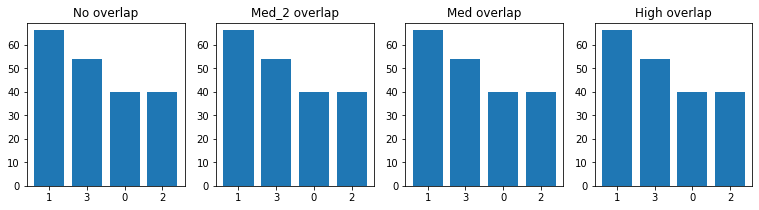

In [67]:
fig,axes = plt.subplots(1,4,figsize=(13,3))
data1=Counter(top_overlap_model1_data['no_overlap']['t'])
data2=Counter(top_overlap_model1_data['med_2_overlap']['t'])
data3=Counter(top_overlap_model1_data['med_overlap']['t'])
data4=Counter(top_overlap_model1_data['high_overlap']['t'])
axes[0].bar(range(len(data1)), list(data.values()), tick_label=list(data.keys()))
axes[1].bar(range(len(data2)), list(data.values()), tick_label=list(data.keys()))
axes[2].bar(range(len(data3)), list(data.values()), tick_label=list(data.keys()))
axes[3].bar(range(len(data4)), list(data.values()), tick_label=list(data.keys()))
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

#plt.show()


Text(0.5, 1.0, 'High overlap')

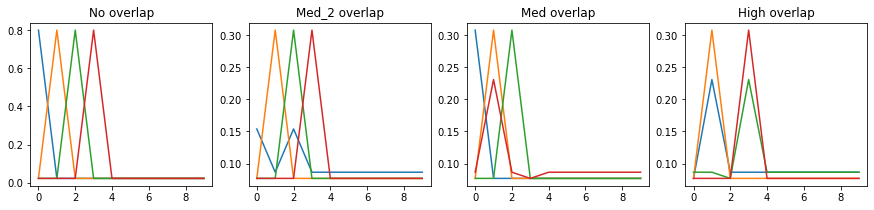

In [66]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model1_data['no_overlap']['phi'])
data2=pd.DataFrame(top_overlap_model1_data['med_2_overlap']['phi'])
data3=pd.DataFrame(top_overlap_model1_data['med_overlap']['phi'])
data4=pd.DataFrame(top_overlap_model1_data['high_overlap']['phi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")
#ax.set_xlabel("v")
#ax.set_ylabel(r'$\phi_{k,v}$')
#plt.title("Distribution of words under each topic k")

### Model 2

In [91]:
# Simulated data
top_overlap_model2_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    if i=='no':
        with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap.pkl','rb') as file:     
            top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)
    else:
        with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap_rev.pkl','rb') as file:     
            top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)

Text(0.5, 1.0, 'High overlap')

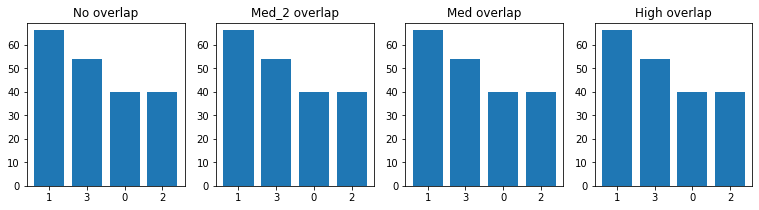

In [92]:
fig,axes = plt.subplots(1,4,figsize=(13,3))
data1=Counter(top_overlap_model2_data['no_overlap']['t'])
data2=Counter(top_overlap_model2_data['med_2_overlap']['t'])
data3=Counter(top_overlap_model2_data['med_overlap']['t'])
data4=Counter(top_overlap_model2_data['high_overlap']['t'])
axes[0].bar(range(len(data1)), list(data.values()), tick_label=list(data.keys()))
axes[1].bar(range(len(data2)), list(data.values()), tick_label=list(data.keys()))
axes[2].bar(range(len(data3)), list(data.values()), tick_label=list(data.keys()))
axes[3].bar(range(len(data4)), list(data.values()), tick_label=list(data.keys()))
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

#plt.show()


Text(0.5, 1.0, 'High overlap')

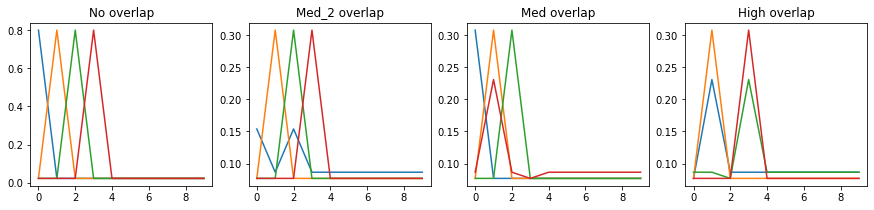

In [93]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model2_data['no_overlap']['phi'])
data2=pd.DataFrame(top_overlap_model2_data['med_2_overlap']['phi'])
data3=pd.DataFrame(top_overlap_model2_data['med_overlap']['phi'])
data4=pd.DataFrame(top_overlap_model2_data['high_overlap']['phi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")
#ax.set_xlabel("v")
#ax.set_ylabel(r'$\phi_{k,v}$')
#plt.title("Distribution of words under each topic k")

In [98]:
# Get summaries for primary secondary topic allocations in simulated data
def primary_secondary_topic_barplot(sim_data,ax=None):
    d3=defaultdict(list)
    #make values (lists) of inner dic, a single list
    for k,v in sim_data['z'].items():
        ls=list()
        for i in v.values():
            ls.extend(i)
        d3[k]=ls
    #apply Counter on values of dic 
    d4={k:Counter(v) for k,v in d3.items()}
    axx2=pd.DataFrame(d4).T.fillna(0).plot.bar(stacked=True,figsize=(20,5),ax=ax)
    axx2.set_xlabel("session d")
    axx2.set_ylabel(r'$z_{d}$')
    plt.title("Proportion of 0s and 1s in each session")

Text(0.5, 1.0, 'High overlap')

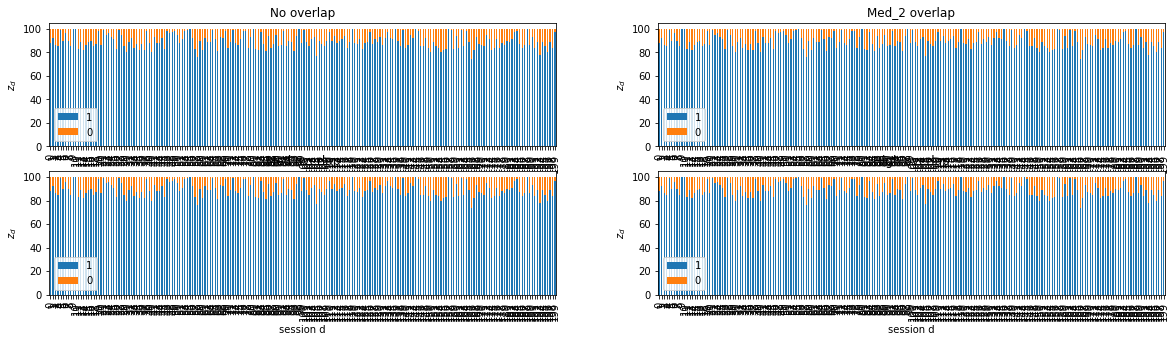

In [104]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
primary_secondary_topic_barplot(top_overlap_model2_data['no_overlap'],ax=axes[0,0])
primary_secondary_topic_barplot(top_overlap_model2_data['med_2_overlap'],ax=axes[0,1])
primary_secondary_topic_barplot(top_overlap_model2_data['med_overlap'],ax=axes[1,0])
primary_secondary_topic_barplot(top_overlap_model2_data['high_overlap'],ax=axes[1,1])
axes[0,0].set_title("No overlap")
axes[0,1].set_title("Med_2 overlap")
axes[1,0].set_title("Med overlap")
axes[1,1].set_title("High overlap")

### Model 3

In [105]:
# Simulated data
top_overlap_model3_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    #if i=='no':
    #    with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap.pkl','rb') as file:     
    #        top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)
    #else:
    with open(f'./simulated_data/topic_overlap/model_3/data_m3_{str(i)}_overlap_rev.pkl','rb') as file:     
        top_overlap_model3_data[f'{str(i)}_overlap']=pickle.load(file)

Text(0.5, 1.0, 'High overlap')

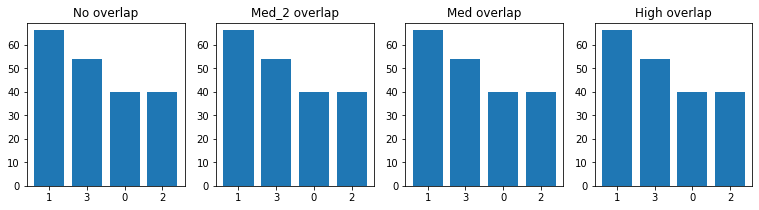

In [108]:
fig,axes = plt.subplots(1,4,figsize=(13,3))
data1=Counter(top_overlap_model3_data['no_overlap']['t'])
data2=Counter(top_overlap_model3_data['med_2_overlap']['t'])
data3=Counter(top_overlap_model3_data['med_overlap']['t'])
data4=Counter(top_overlap_model3_data['high_overlap']['t'])
axes[0].bar(range(len(data1)), list(data.values()), tick_label=list(data.keys()))
axes[1].bar(range(len(data2)), list(data.values()), tick_label=list(data.keys()))
axes[2].bar(range(len(data3)), list(data.values()), tick_label=list(data.keys()))
axes[3].bar(range(len(data4)), list(data.values()), tick_label=list(data.keys()))
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

Text(0.5, 1.0, 'High overlap')

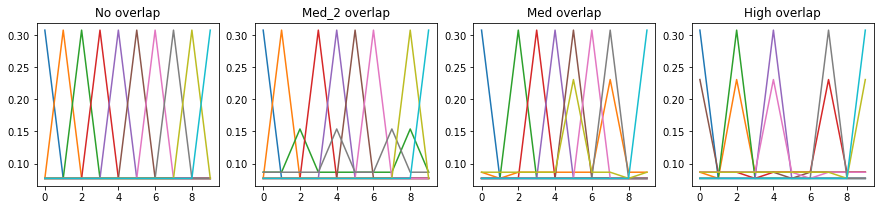

In [106]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model3_data['no_overlap']['phi'])
data2=pd.DataFrame(top_overlap_model3_data['med_2_overlap']['phi'])
data3=pd.DataFrame(top_overlap_model3_data['med_overlap']['phi'])
data4=pd.DataFrame(top_overlap_model3_data['high_overlap']['phi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

Text(0.5, 1.0, 'High overlap')

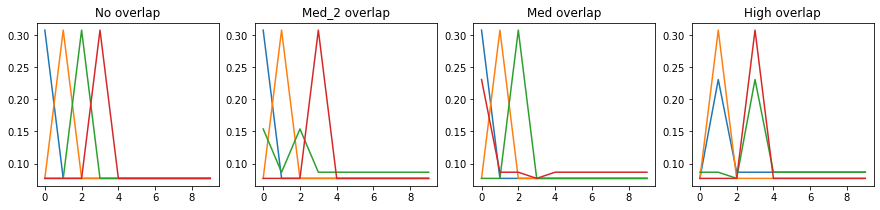

In [107]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model3_data['no_overlap']['psi'])
data2=pd.DataFrame(top_overlap_model3_data['med_2_overlap']['psi'])
data3=pd.DataFrame(top_overlap_model3_data['med_overlap']['psi'])
data4=pd.DataFrame(top_overlap_model3_data['high_overlap']['psi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

### Model 4

In [109]:
# Simulated data
top_overlap_model4_data={}
overlap_list=list(['high','med','med_2','no'])
for i in overlap_list:
    #if i=='no':
    #    with open(f'./simulated_data/topic_overlap/model_2/data_m2_{str(i)}_overlap.pkl','rb') as file:     
    #        top_overlap_model2_data[f'{str(i)}_overlap']=pickle.load(file)
    #else:
    with open(f'./simulated_data/topic_overlap/model_4/data_m4_{str(i)}_overlap_rev.pkl','rb') as file:     
        top_overlap_model4_data[f'{str(i)}_overlap']=pickle.load(file)

Text(0.5, 1.0, 'High overlap')

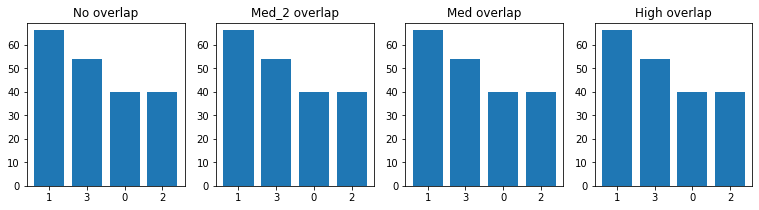

In [110]:
fig,axes = plt.subplots(1,4,figsize=(13,3))
data1=Counter(top_overlap_model4_data['no_overlap']['t'])
data2=Counter(top_overlap_model4_data['med_2_overlap']['t'])
data3=Counter(top_overlap_model4_data['med_overlap']['t'])
data4=Counter(top_overlap_model4_data['high_overlap']['t'])
axes[0].bar(range(len(data1)), list(data.values()), tick_label=list(data.keys()))
axes[1].bar(range(len(data2)), list(data.values()), tick_label=list(data.keys()))
axes[2].bar(range(len(data3)), list(data.values()), tick_label=list(data.keys()))
axes[3].bar(range(len(data4)), list(data.values()), tick_label=list(data.keys()))
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

Text(0.5, 1.0, 'High overlap')

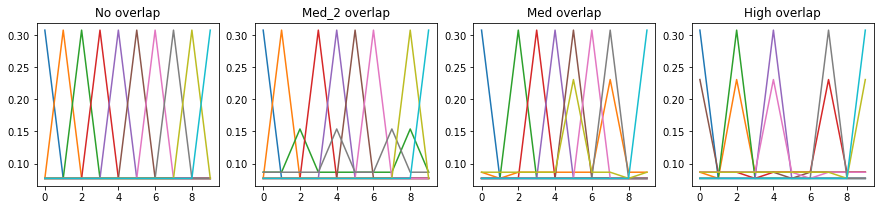

In [111]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model4_data['no_overlap']['phi'])
data2=pd.DataFrame(top_overlap_model4_data['med_2_overlap']['phi'])
data3=pd.DataFrame(top_overlap_model4_data['med_overlap']['phi'])
data4=pd.DataFrame(top_overlap_model4_data['high_overlap']['phi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

Text(0.5, 1.0, 'High overlap')

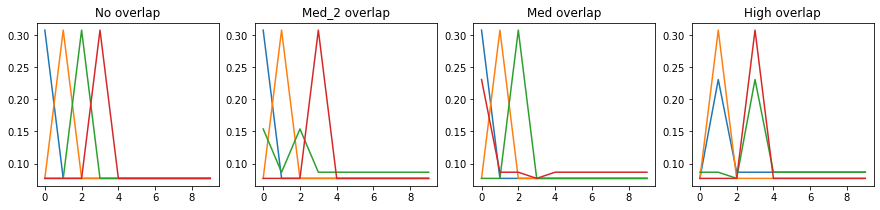

In [112]:
fig,axes = plt.subplots(1,4,figsize=(15,3))
data1=pd.DataFrame(top_overlap_model4_data['no_overlap']['psi'])
data2=pd.DataFrame(top_overlap_model4_data['med_2_overlap']['psi'])
data3=pd.DataFrame(top_overlap_model4_data['med_overlap']['psi'])
data4=pd.DataFrame(top_overlap_model4_data['high_overlap']['psi'])
axes[0].plot(data1)
axes[1].plot(data2)
axes[2].plot(data3)
axes[3].plot(data4)
axes[0].set_title("No overlap")
axes[1].set_title("Med_2 overlap")
axes[2].set_title("Med overlap")
axes[3].set_title("High overlap")

Text(0.5, 1.0, 'High overlap')

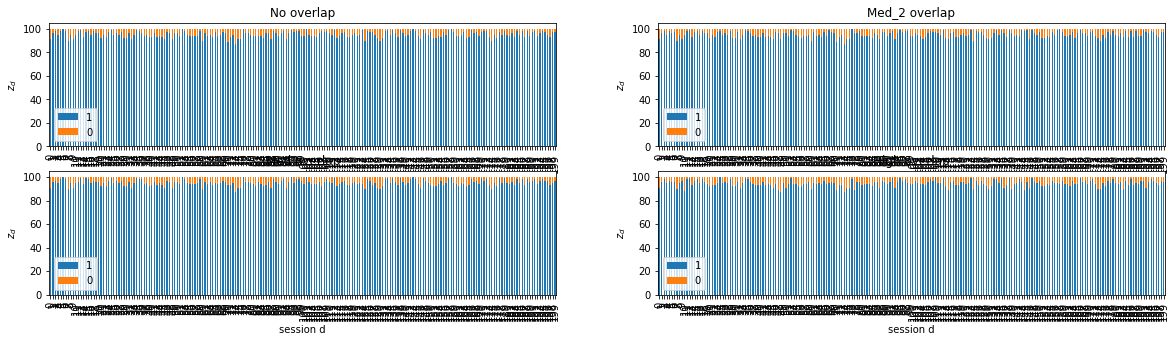

In [118]:
fig,axes = plt.subplots(2,2,figsize=(15,30))
primary_secondary_topic_barplot(top_overlap_model4_data['no_overlap'],ax=axes[0,0])
primary_secondary_topic_barplot(top_overlap_model4_data['med_2_overlap'],ax=axes[0,1])
primary_secondary_topic_barplot(top_overlap_model4_data['med_overlap'],ax=axes[1,0])
primary_secondary_topic_barplot(top_overlap_model4_data['high_overlap'],ax=axes[1,1])
axes[0,0].set_title("No overlap")
axes[0,1].set_title("Med_2 overlap")
axes[1,0].set_title("Med overlap")
axes[1,1].set_title("High overlap")